# Segmentation par seuillage
1. Ouverture / visualisation des images
2. Seuillage sur des images en niveaux de gris
3. Seuillage automatique (OTSU)


## 1. Ouverture / visualisation des images


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from keras.models import load_model
from PIL import Image, ImageOps
import os
import cv2 as cv
import natsort

#### Ouverture des images étudiées

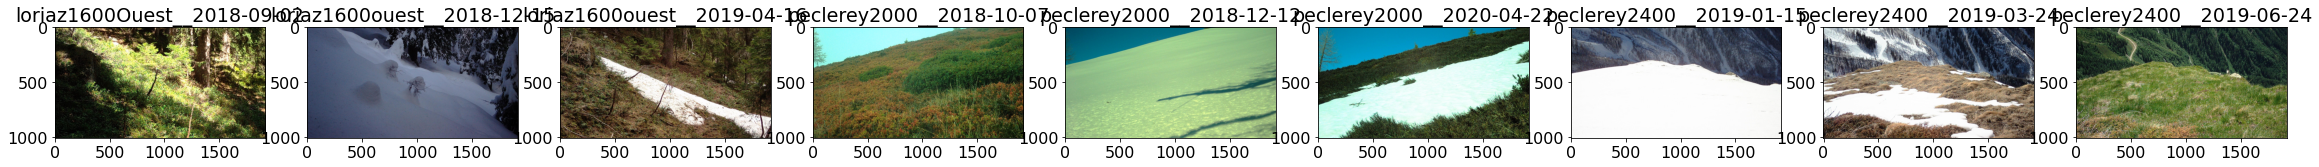

In [24]:
dir  = os.getcwd()
dir,__ = os.path.split(dir)
imgs_path = os.listdir(dir + '/data/Ref/Imgs')
imgs_path.sort()

imgs = []
for i in imgs_path:
    imgs += [imread(f"{dir}/data/Ref/Imgs/{i}")]

fig, axs = plt.subplots(1, 9, figsize = (40, 10))
for i in range(len(imgs)):
    axs[i].imshow(imgs[i])
    axs[i].set_title(imgs_path[i][:-17])
plt.show()

## 2. Seuillage sur des images en niveaux de gris

Influence du choix du niveau de seuil

niveaux ne seuils [75, 100, 125, 150, 175, 200, 225, 250]


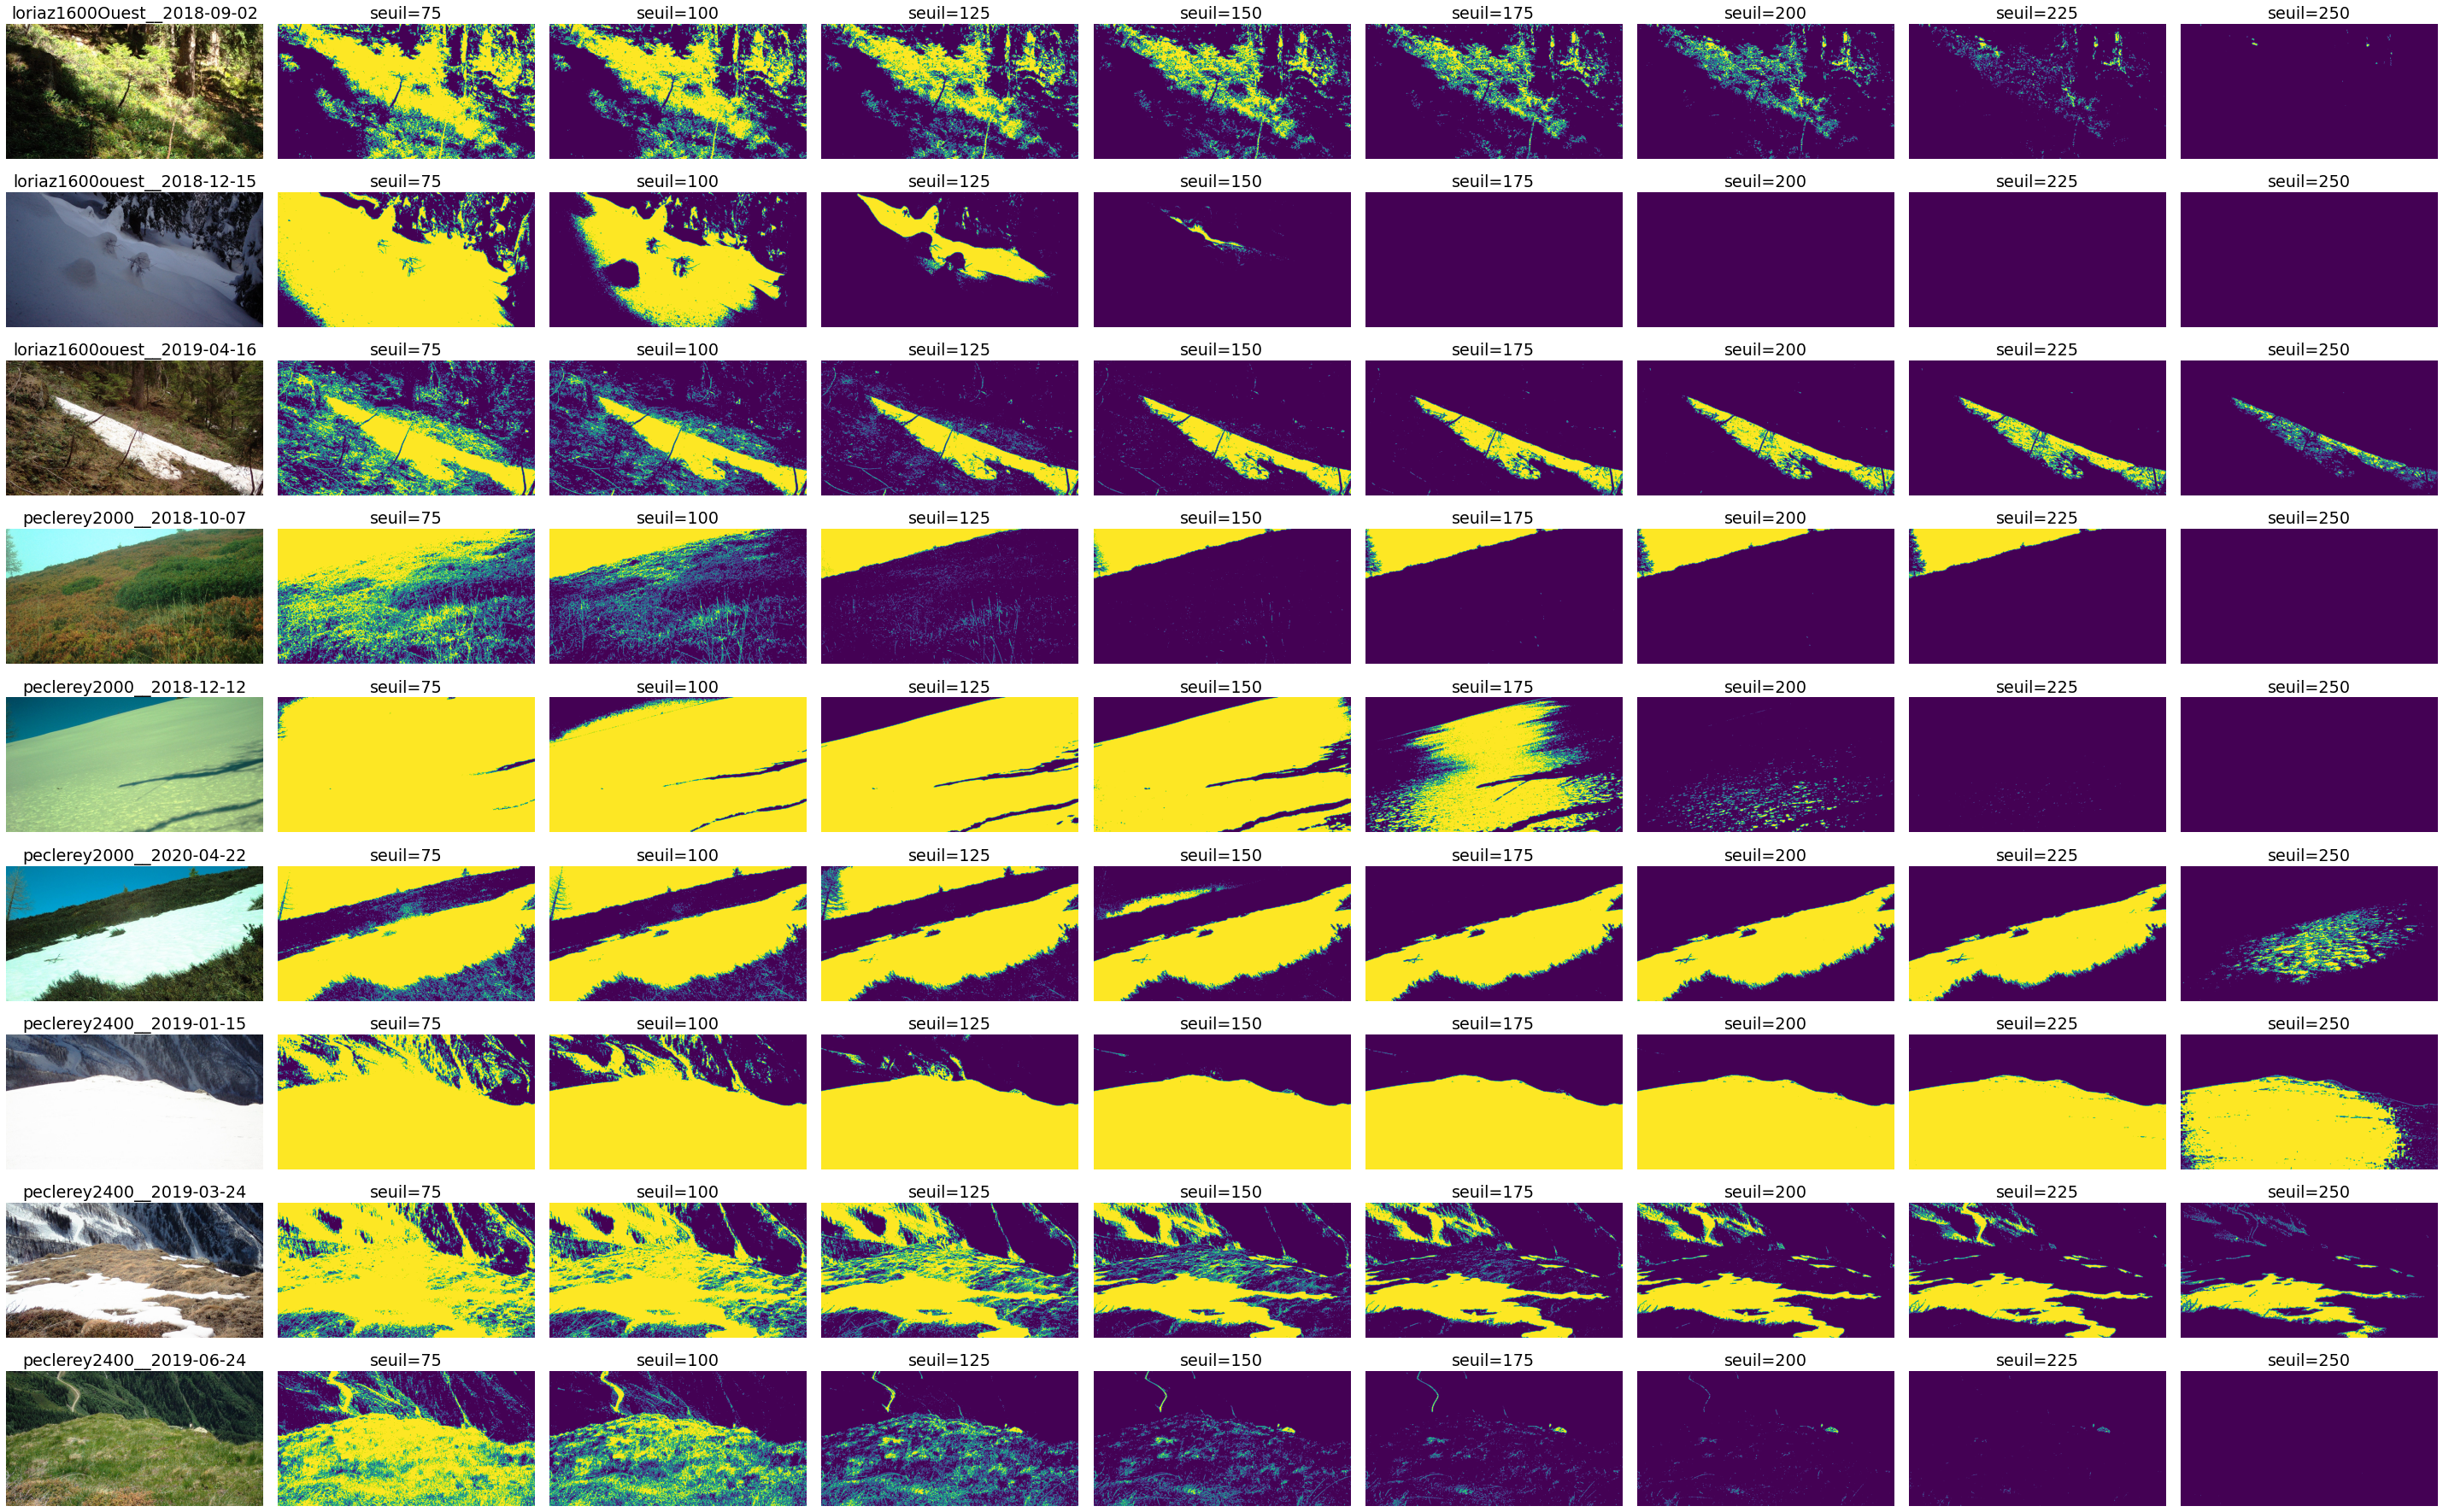

In [3]:
seuils = [75, 100, 125, 150, 175, 200, 225, 250]
print("niveaux ne seuils", seuils)

plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(9, 9, figsize = (40, 25))
for i, img in enumerate(imgs):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    axs[i][0].imshow(img)
    axs[i][0].set_axis_off()
    axs[i][0].set_title(imgs_path[i][:-17])
    for j, seuil in enumerate(seuils):
        ret1,th1 = cv.threshold(gray, seuil, 255, cv.THRESH_BINARY)
        axs[i][j+1].imshow(th1)
        axs[i][j+1].set_axis_off()
        axs[i][j+1].set_title(f'seuil={seuil}')
plt.tight_layout()
plt.show()

## 3. Seuillage automatique (OTSU)

In [4]:
def OTSU(img):
    # Otsu's thresholding
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret2,th2 = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    return th2

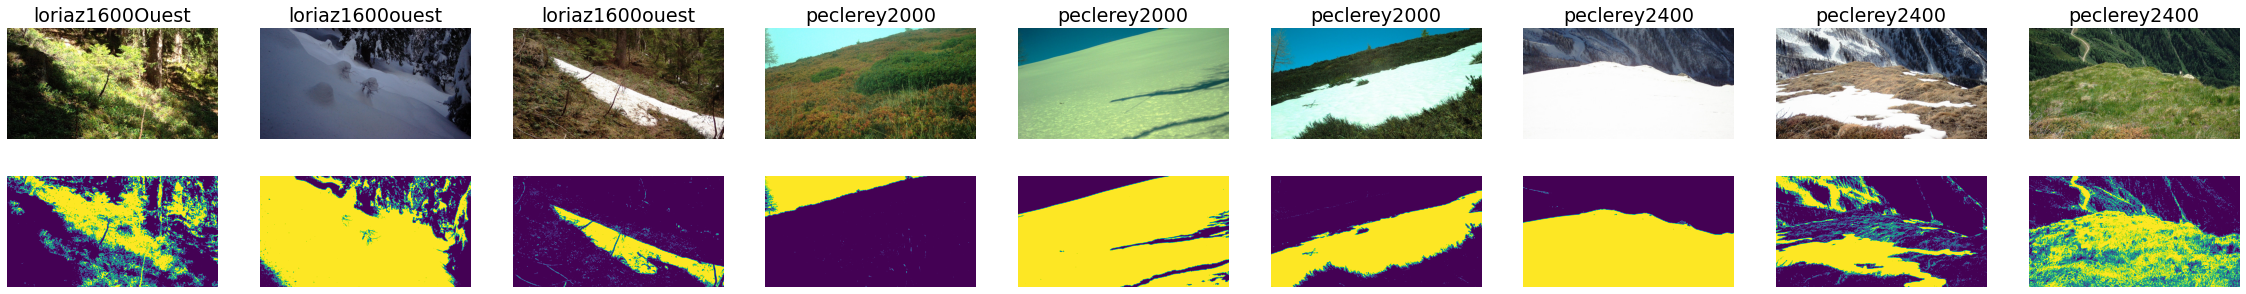

In [5]:
fig, axs = plt.subplots(2, 9, figsize = (40, 5))
for i, img in enumerate(imgs):
    axs[0][i].imshow(img)
    axs[0][i].set_title(imgs_path[i][:-29])
    axs[0][i].set_axis_off()

    axs[1][i].imshow(OTSU(img))
    axs[1][i].set_axis_off()

plt.show()